## Learning Goals

##### - Finding the distribution of features in datasets with exploratory analysis
##### - Identifying potential bias by documenting the differences between privileged and under-privileged groups
##### - Finding the prevelence between features and target variables 
##### - Training a Machine Learning model 
##### - Evaluating a Machine Learning model with respect to its performance with privileged and under-privileged groups in       dataset
##### - Confirming bias in the dataset and identifying the bias type


 UCI Adult Dataset. Please download the dataset from here (https://archive.ics.uci.edu/ml/datasets/adult) and save it as a csv.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif

In [2]:
from google.colab import drive
from google.colab import files 

drive.mount('/content/drive')
path_file = 'drive/My Drive/adult.data'

Mounted at /content/drive


In [3]:
names = ['age','workclass','fnlwgt','education','education-num',
        'marital-status','occupation','relationship','race','sex',
        'capital-gain','capital-loss','hours-per-week','native-country',
        'y']

#Load dataset
df = pd.read_csv(path_file ,names=names,na_values='?')
df = df.dropna()

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
null_columns = df.columns[df.isnull().any()].tolist()
print(f'Number of columns with missing values: {len(null_columns)}')

Number of columns with missing values: 0


## Data Analysis

#### We will first do some exploratory data analysis to get a better understadning of the distribution of sensitive variables like race and gender that can make the dataset biased.

Text(0.5, 1.0, 'Race')

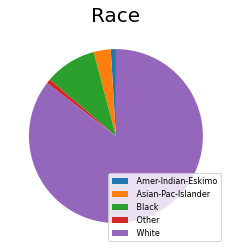

In [7]:
#TASK 1
#Get the popluation count by race

################

counts = df.groupby("race").size()

################

labels = counts.index

#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=4,fontsize=8)
plt.title("Race",size=20)

Text(0.5, 1.0, 'Sex')

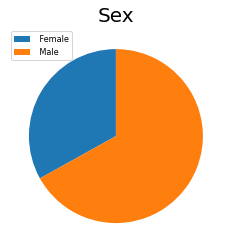

In [9]:
from itertools import groupby
#TASK 2

#Get the popluation count by Sex

################

counts = df.groupby('sex').size()

################

labels = counts.index

#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=8)
plt.title("Sex",size=20)

#### Question: What do you notice in the distribution of different values of race and gender?

#### Defining protected features


##### Before we move on, we will need to define our protected features. We do this by creating binary variables using the sensitive attributes. We define the variable so that 1 represents a privileged group and 0 represents an unprivileged group.

In [10]:
# We define these features using the code below. For race, we define 
# the protected feature so that “White” is the privileged group. 
# That is the variable has a value of 1 if the person is white and 
# 0 otherwise. For sex, “Male” is the privileged group. 

df_fair = df[['race','sex']]

#Define protected features 
df_fair['priv_race'] = [1 if r==' White' else 0 for r in df_fair['race']]
df_fair['priv_sex'] = [1 if s==' Male' else 0 for s in df_fair['sex']]

#Define target variable 
df_fair['y'] =  [1 if y == ' >50K'else 0 for y in df['y']]

<ipython-input-10-48af44a4c718>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fair['priv_race'] = [1 if r==' White' else 0 for r in df_fair['race']]
<ipython-input-10-48af44a4c718>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fair['priv_sex'] = [1 if s==' Male' else 0 for s in df_fair['sex']]
<ipython-input-10-48af44a4c718>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

## Bias and Prevalence

#### For a target variable, prevalence is the proportion of the positive cases to overall cases. Where a positive case is when the target variable has a value of 1. Our dataset has an overall prevalence of 24.8%. That is roughly 1/4 of the people in our dataset earn above $50K. We can also use prevalence as an indicator of bias in our dataset. Ideally, in datasets with no bias, prevalence of all features, irrespective of their values should be the same.

In [14]:
# TASK 3

#Calculate the prevelance
#Look into the groupby operation for pandas

####
#Calculate the prevelance of target variable of y
prev = df_fair['y'].mean()
print(prev)

####
#Calculate the prevelance of priv_race with respect to y
prev_race = df_fair.groupby('priv_race')['y'].mean()
print('race')
print(prev_race)

####
#Calculate the prevelance of priv_Sex with respect to y
prev_sex = df_fair.groupby('priv_sex')['y'].mean()
print('sex')
print(prev_sex)

####
#Calculate the combined prevelance of priv_race and priv_sex with respect to y
prev_comb = df_fair.groupby(['priv_race','priv_sex'])['y'].mean()
print('comb')
print(prev_comb)




0.2408095574460244
race
priv_race
0    0.152582
1    0.255860
Name: y, dtype: float64
sex
priv_sex
0    0.109461
1    0.305737
Name: y, dtype: float64
comb
priv_race  priv_sex
0          0           0.070925
           1           0.219037
1          0           0.118954
           1           0.317565
Name: y, dtype: float64


In [13]:
df_fair.head()

,race,sex,priv_race,priv_sex,y
0,White,Male,1,1,0
1,White,Male,1,1,0
2,White,Male,1,1,0
3,Black,Male,0,1,0
4,Black,Female,0,0,0


#### Question: What do you notice about the difference in prevelence between privileged and underpriveleged race and sex?

#### At this point, you should be asking yourself why we have these large differences in prevalence. The dataset was built using United States census data from 1994. The country has a history of discrimination based on gender and race. Ultimately, the target variable reflects this discrimination. In this sense, prevalence can be used to understand the extent to which historical injustice is embedded in our target variable.

In [15]:
#Target variable 
y = [1 if y == ' >50K' else 0 for y in df['y']]

#Model features
X = df[['age','education-num','hours-per-week']]
X['marital-status'] = [1 if x==' Married-civ-spouse' else 0 for x in df['marital-status']] 
X['native-country'] = [1 if x==' United-States' else 0 for x in df['native-country']] 

occ_groups = {
    ' Priv-house-serv':0,' Other-service':0,' Handlers-cleaners':0,
    ' Farming-fishing':1,' Machine-op-inspct':1,' Adm-clerical':1,
    ' Transport-moving':2,' Craft-repair':2,' Sales':2, ' ?': -1,
    ' Armed-Forces':3,' Tech-support':3,' Protective-serv':3,
    ' Prof-specialty':4,' Exec-managerial':4}

X['occupation'] = [occ_groups[x] for x in df['occupation']]

X.head()

<ipython-input-15-9baefa97e907>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['marital-status'] = [1 if x==' Married-civ-spouse' else 0 for x in df['marital-status']]
<ipython-input-15-9baefa97e907>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'] = [1 if x==' United-States' else 0 for x in df['native-country']]
<ipython-input-15-9baefa97e907>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,age,education-num,hours-per-week,marital-status,native-country,occupation
0,39,13,40,0,1,1
1,50,13,13,1,1,4
2,38,9,40,0,1,0
3,53,7,40,1,1,0
4,28,13,40,1,0,4


## Fairness Metrics

#### Different metrics can be used to evaluate the fairness of an AI tool. These include equality of opportunity, statistical parity, predictive parity and calibration. You can find more details about these fairness metrics in this paper from Pratyush and Vilasenor (2020) https://arxiv.org/pdf/2001.07864.pdf. 

#### In this exercise we will be using equality of opportunity as a metric to evaluate the fairness of ML algorithms. You will train two algorithms (Random Forest and SVM) and evaluate/compare their accuracies acorss different groups. 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#TASK 4
#Training a Random forest Classifier

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)
df_fair['y_pred'] = y_pred



<ipython-input-17-5aa69f16c8e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fair['y_pred'] = y_pred


In [18]:

def fairness_metrics(df):
    
# TASK 5
# Make a Confusion Matrix of real values and predicted values
    cm = confusion_matrix(df['y'], df['y_pred'])
    TN, FP, FN, TP = cm.ravel()
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    
    return np.array([ACC])  

In [19]:


#TASK 6
#Calculate the fairness metrics for privileged and under-privileed group in race 
fm_race_1 = fairness_metrics(df_fair[df_fair.priv_race==1])
fm_race_0 = fairness_metrics(df_fair[df_fair.priv_race==0])

#Get ratio of fairness metrics
fm_race = fm_race_0/fm_race_1

print(fm_race_0)
print(fm_race_1)

[0.87376185]
[0.80784441]


In [21]:
#TASK 7

#Calculate the fairness metrics for privileged and under-privileed group in sex 
fm_sex_1 = fairness_metrics(df_fair[df_fair.priv_sex==1])
fm_sex_0 = fairness_metrics(df_fair[df_fair.priv_sex==0])
print(fm_sex_1)
print(fm_sex_0)

[0.77310693]
[0.90715811]


In [22]:
#TASK 8
#Training a Support Vector Machine Model

model1 = svm.SVC()
model1.fit(X, y)

#Get predictions
y_pred_svm = model1.predict(X)
df_fair['y_pred_svm'] = y_pred_svm

<ipython-input-22-e7ce67d51851>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fair['y_pred_svm'] = y_pred_svm


In [23]:
def fairness_metrics_2(df):
    """Calculate fairness for subgroup of population"""
    
# Make a Confusion Matrix of real values and target values
    cm=confusion_matrix(df['y'],df['y_pred_svm'])
    TN, FP, FN, TP = cm.ravel()
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    
    return np.array([ACC])  

In [24]:
#TASK 9
#Calculate the fairness metrics for privileged and under-privileed group in race for SVM
fm_race_1_svm = fairness_metrics_2(df_fair[df_fair.priv_race==1])
fm_race_0_svm = fairness_metrics_2(df_fair[df_fair.priv_race==0])

#Get ratio of fairness metrics
fm_race_svm = fm_race_0_svm/fm_race_1_svm

print(fm_race_0_svm)
print(fm_race_1_svm)

[0.87586934]
[0.81600518]


In [25]:
#TASK 10
#Calculate the fairness metrics for privileged and under-privileed group in sex for SVM
fm_sex_1_svm = fairness_metrics_2(df_fair[df_fair.priv_sex==1])
fm_sex_0_svm = fairness_metrics_2(df_fair[df_fair.priv_sex==0])

#Get ratio of fairness metrics
fm_sex_svm = fm_sex_0_svm/fm_sex_1_svm

print(fm_sex_0_svm)
print(fm_sex_1_svm)

[0.89824529]
[0.78838917]
